<h2><center><b>Forecasting Stock Market Prices using Two Machine Learning Algorithms</b></center></h2>
<h3><center><b>by
<p> Charles C. Nworu and Precious I. Ugwu</b></center></h3>

<h3><b>Summary of the work</b></h3>
<p>The code is a summary of the project work done by Precious Ugwu, submitted to the Department of Stattistics, Michael Okpara University of Agriculture, Umudike and supervised by Charles Nworu.</p>
<p>We designed two deep learning methods for predicting stock market prices, namely; 1D-CNN and LSTM. We built a flexible and robust architecture that will reduce the mean sum of squares between the predicted and actual values of the stock prices.</p>
<p>Two high-level machine learning libraries were used for the task which includes; Tensorflow and Keras. Their performances were measured using mean squared error (MSE) and root mean squared error (RMSE).</p>

## Read data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/AAPL.csv")

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10773,9/26/2023,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
10774,9/27/2023,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
10775,9/28/2023,169.339996,172.029999,167.619995,170.690002,170.690002,56294400
10776,9/29/2023,172.020004,173.070007,170.339996,171.210007,171.210007,51814200
10777,10/2/2023,171.220001,174.300003,170.929993,173.750000,173.750000,52115400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10778 entries, 0 to 10777
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10778 non-null  object 
 1   Open       10778 non-null  float64
 2   High       10778 non-null  float64
 3   Low        10778 non-null  float64
 4   Close      10778 non-null  float64
 5   Adj Close  10778 non-null  float64
 6   Volume     10778 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 589.5+ KB


In [ ]:
df.Date = pd.to_datetime(df["Date"], format='%m/%d/%Y')
df.index = pd.to_datetime(df["Date"], format='%m/%d/%Y')

<Axes: xlabel='Date'>

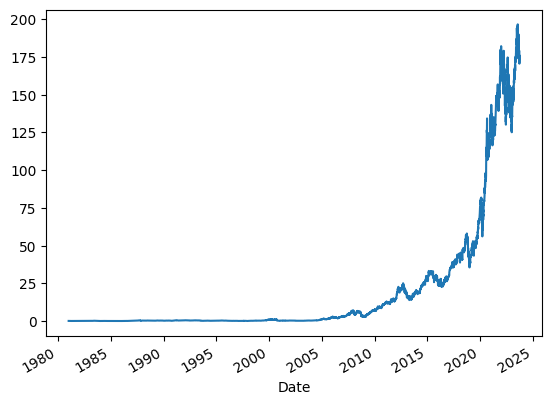

In [ ]:
df["Close"].plot()

In [ ]:
new_df = df["Close"]

## Define window size

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  dates = []
  for i in range(len(df_as_np) - window_size):
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
    dt = df.index[i+5]
    dates.append(dt)
  return np.array(X), np.array(y), np.array(dates)

In [ ]:
WINDOW_SIZE = 5
X, y, dates = df_to_X_y(new_df, WINDOW_SIZE)

## Divide into train, validation and test sets

In [ ]:
splitratio = int(len(new_df)*0.8) # 80% ratio for train set
remainingratio = int((len(new_df) - splitratio) * 0.5) # 10% ratio for validation set

X_train, y_train = X[:splitratio], y[:splitratio]
X_val, y_val = X[splitratio:(splitratio+remainingratio)], y[splitratio:(splitratio+remainingratio)]
X_test, y_test = X[(splitratio+remainingratio):], y[(splitratio+remainingratio):]

## Partition dates

In [ ]:
date_train = dates[:splitratio]
date_val = dates[splitratio:(splitratio+remainingratio)]
date_test = dates[(splitratio+remainingratio):]

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Change the dimensions
X_train = X_train.reshape(X_train.shape[0], 5)
X_val = X_val.reshape(X_val.shape[0], 5)
X_test = X_test.reshape(X_test.shape[0], 5)

scaler = MinMaxScaler()

scaler.fit(X_train)

scaled_train = scaler.transform(X_train)
scaled_val = scaler.transform(X_val)
scaled_test = scaler.transform(X_test)

# Rescale the dimensions

scaled_train = scaled_train.reshape(X_train.shape[0], 5, 1)
scaled_val = scaled_val.reshape(X_val.shape[0], 5, 1)
scaled_test = scaled_test.reshape(X_test.shape[0], 5, 1)

## Import necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

## Convolutional Neural Network

In [ ]:
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(5, 1)))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1, activation='linear'))

cp = ModelCheckpoint('model1/', save_best_only=True)
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 3, 16)             64        
                                                                 
 batch_normalization_2 (Bat  (None, 3, 16)             64        
 chNormalization)                                                
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 64)             3136      
                                                                 
 batch_normalization_3 (Bat  (None, 1, 64)             256       
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
model.fit(scaled_train, y_train, validation_data=(scaled_val, y_val), epochs=10, callbacks=[cp], shuffle=False)

Epoch 1/10
270/270 [==============================] - 3s 7ms/step - loss: 29.6612 - root_mean_squared_error: 5.4462 - val_loss: 919.9009 - val_root_mean_squared_error: 30.3299
Epoch 2/10
270/270 [==============================] - 2s 7ms/step - loss: 47.9455 - root_mean_squared_error: 6.9243 - val_loss: 531.4191 - val_root_mean_squared_error: 23.0525
Epoch 3/10
270/270 [==============================] - 2s 8ms/step - loss: 43.6424 - root_mean_squared_error: 6.6062 - val_loss: 38.3760 - val_root_mean_squared_error: 6.1948
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 42.9527 - root_mean_squared_error: 6.5538 - val_loss: 145.4849 - val_root_mean_squared_error: 12.0617
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 42.7653 - root_mean_squared_error: 6.5395 - val_loss: 62.8938 - val_root_mean_squared_error: 7.9306
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 42.7053 - root_mean_squared_error: 6.5349 - val_lo

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("model1/")

## Evaluation on train sets

In [ ]:
train_predictions = model.predict(scaled_train).flatten()

270/270 [==============================] - 0s 1ms/step


In [ ]:
train_results = pd.DataFrame(data={"date":date_train, "actuals": y_train, "train_predictions":train_predictions})
train_results

,date,actuals,train_predictions
0,1981-01-09,0.142299,-6.186028
1,1981-01-12,0.141183,-6.179890
2,1981-01-13,0.136161,-6.185524
3,1981-01-14,0.136719,-6.189684
4,1981-01-15,0.139509,-6.192086
...,...,...,...
8617,2015-03-11,30.559999,31.857590
8618,2015-03-12,31.112499,31.960289
8619,2015-03-13,30.897499,34.140297
8620,2015-03-16,31.237499,32.229389


<Axes: xlabel='date'>

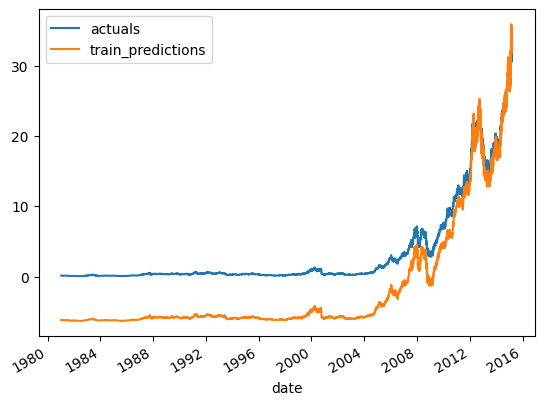

In [ ]:
train_results.plot(kind="line", x=0, label=True)

##Evaluation on validation sets

In [ ]:
val_predictions = model.predict(scaled_val).flatten()

34/34 [==============================] - 0s 2ms/step


In [ ]:
val_results = pd.DataFrame(data={"date":date_val, "actuals": y_val, "val_predictions":val_predictions})
val_results

,date,actuals,val_predictions
0,2015-03-18,32.117500,33.738209
1,2015-03-19,31.875000,33.506264
2,2015-03-20,31.475000,32.355457
3,2015-03-23,31.802500,32.343090
4,2015-03-24,31.672501,34.262699
...,...,...,...
1073,2019-06-21,49.695000,60.168419
1074,2019-06-24,49.645000,60.360500
1075,2019-06-25,48.892502,60.581230
1076,2019-06-26,49.950001,59.722095


<Axes: xlabel='date'>

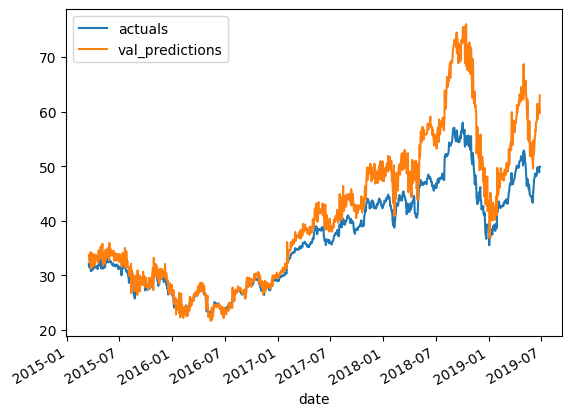

In [ ]:
val_results.plot(kind="line", x=0, label=True)

##Evaluation on test sets

In [ ]:
test_predictions = model.predict(scaled_test).flatten()

34/34 [==============================] - 0s 1ms/step


In [ ]:
test_results = pd.DataFrame(data={"date":date_test, "actuals": y_test, "test_predictions":test_predictions})
test_results

,date,actuals,test_predictions
0,2019-06-28,49.480000,61.407352
1,2019-07-01,50.387501,58.911255
2,2019-07-02,50.682499,62.898411
3,2019-07-03,51.102501,62.609188
4,2019-07-05,51.057499,62.036236
...,...,...,...
1068,2023-09-26,171.960007,294.402008
1069,2023-09-27,170.429993,277.714020
1070,2023-09-28,170.690002,279.617706
1071,2023-09-29,171.210007,282.292511


<Axes: xlabel='date'>

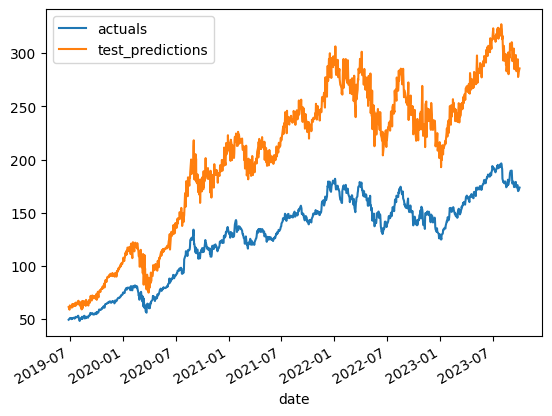

In [ ]:
test_results.plot(kind="line", x=0, label=True)

## Root Mean Squared Error

In [ ]:
def rmse(df):
  actual = df.iloc[:,1]
  predicted = df.iloc[:,2]
  rmse = (np.mean((actual - predicted)**2))**0.5
  return rmse

In [ ]:
# rmse for tarining set

rmse_train = rmse(train_results)
print("The root mean squared error for the training set is", rmse_train)

The root mean squared error for the training set is 5.4620723353737635


In [ ]:
# rmse for validation set

rmse_val = rmse(val_results)
print("The root mean squared error for the validation set is", rmse_val)

The root mean squared error for the validation set is 6.194832655485744


In [ ]:
# rmse for test set

rmse_test = rmse(test_results)
print("The root mean squared error for the test set is", rmse_test)

The root mean squared error for the test set is 82.47985932158682


## Long Short Term Memory

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Dropout, LSTM, AveragePooling1D

In [ ]:
# Create an instance for the LSTM model

model2 = Sequential()
model2.add(LSTM(30, input_shape=(5, 1)))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

# Fully connected layers
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='linear'))

# optimizer
cp2 = ModelCheckpoint('model2/', save_best_only=True)

model2.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                3840      
                                                                 
 batch_normalization_4 (Bat  (None, 30)                120       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                1984      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6009 (23.47 KB)
Trainable params: 5949 (23.24 KB)
Non-trainable params: 60 (240.00 Byte)
_________________

In [ ]:
model2.fit(scaled_train, y_train, validation_data=(scaled_val, y_val), epochs=10, callbacks=[cp2], shuffle=False)

Epoch 1/10
270/270 [==============================] - 10s 26ms/step - loss: 6.0907 - root_mean_squared_error: 2.4679 - val_loss: 18.0584 - val_root_mean_squared_error: 4.2495
Epoch 2/10
270/270 [==============================] - 1s 5ms/step - loss: 52.9044 - root_mean_squared_error: 7.2735 - val_loss: 24056.2012 - val_root_mean_squared_error: 155.1006
Epoch 3/10
270/270 [==============================] - 1s 5ms/step - loss: 28.3521 - root_mean_squared_error: 5.3247 - val_loss: 412821.6250 - val_root_mean_squared_error: 642.5120
Epoch 4/10
270/270 [==============================] - 1s 5ms/step - loss: 21.0509 - root_mean_squared_error: 4.5881 - val_loss: 352716.6562 - val_root_mean_squared_error: 593.8995
Epoch 5/10
270/270 [==============================] - 1s 5ms/step - loss: 17.4295 - root_mean_squared_error: 4.1749 - val_loss: 393438.0312 - val_root_mean_squared_error: 627.2464
Epoch 6/10
270/270 [==============================] - 1s 5ms/step - loss: 16.7324 - root_mean_squared_erro

In [ ]:
model2 = load_model("model2/")

## Evaluation on train sets

In [ ]:
train_predictions = model2.predict(scaled_train).flatten()
train_results = pd.DataFrame(data={"date":date_train, "actuals": y_train, "train_predictions":train_predictions})
train_results

270/270 [==============================] - 1s 2ms/step


,date,actuals,train_predictions
0,1981-01-09,0.142299,32.896183
1,1981-01-12,0.141183,32.897167
2,1981-01-13,0.136161,32.897820
3,1981-01-14,0.136719,32.897991
4,1981-01-15,0.139509,32.897980
...,...,...,...
8617,2015-03-11,30.559999,37.817589
8618,2015-03-12,31.112499,37.495594
8619,2015-03-13,30.897499,37.459389
8620,2015-03-16,31.237499,37.248886


<Axes: xlabel='date'>

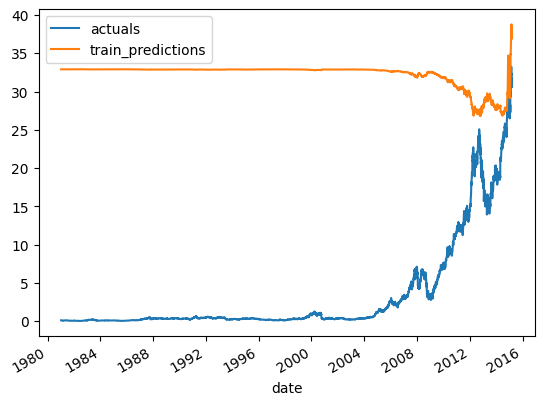

In [ ]:
train_results.plot(kind="line", x=0, label=True)

## Evaluation of Validation set

In [ ]:
val_predictions = model2.predict(scaled_val).flatten()
val_results = pd.DataFrame(data={"date":date_val, "actuals": y_val, "val_predictions":val_predictions})
val_results

34/34 [==============================] - 0s 2ms/step


,date,actuals,val_predictions
0,2015-03-18,32.117500,36.940285
1,2015-03-19,31.875000,37.310265
2,2015-03-20,31.475000,37.421181
3,2015-03-23,31.802500,37.672318
4,2015-03-24,31.672501,37.924259
...,...,...,...
1073,2019-06-21,49.695000,44.997597
1074,2019-06-24,49.645000,45.060162
1075,2019-06-25,48.892502,45.129128
1076,2019-06-26,49.950001,45.082760


<Axes: xlabel='date'>

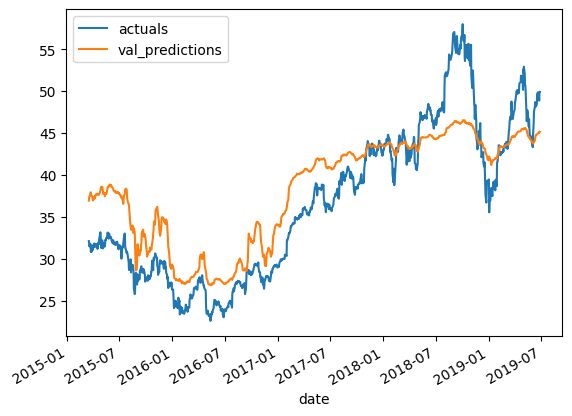

In [ ]:
val_results.plot(kind="line", x=0, label=True)

## Evaluation of test set

In [ ]:
test_predictions = model2.predict(scaled_test).flatten()
test_results = pd.DataFrame(data={"date":date_test, "actuals": y_test, "test_predictions":test_predictions})
test_results

34/34 [==============================] - 0s 3ms/step


,date,actuals,test_predictions
0,2019-06-28,49.480000,45.136139
1,2019-07-01,50.387501,45.100330
2,2019-07-02,50.682499,45.155014
3,2019-07-03,51.102501,45.238686
4,2019-07-05,51.057499,45.276451
...,...,...,...
1068,2023-09-26,171.960007,45.538208
1069,2023-09-27,170.429993,45.717445
1070,2023-09-28,170.690002,45.855797
1071,2023-09-29,171.210007,45.922188


<Axes: xlabel='date'>

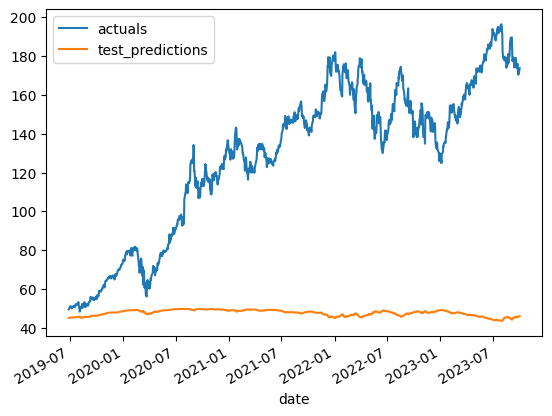

In [ ]:
test_results.plot(kind="line", x=0, label=True)

In [ ]:
# rmse for tarining set

rmse_train = rmse(train_results)
print("The root mean squared error for the training set is", rmse_train)

The root mean squared error for the training set is 29.902979731559842


In [ ]:
# rmse for validation set

rmse_val = rmse(val_results)
print("The root mean squared error for the validation set is", rmse_val)

The root mean squared error for the validation set is 4.24951455649321


In [ ]:
# rmse for test set

rmse_test = rmse(test_results)
print("The root mean squared error for the test set is", rmse_test)

The root mean squared error for the test set is 90.26485300746677
